<a href="https://colab.research.google.com/github/JoshuaK007/CSC-302/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
print(df.head())

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

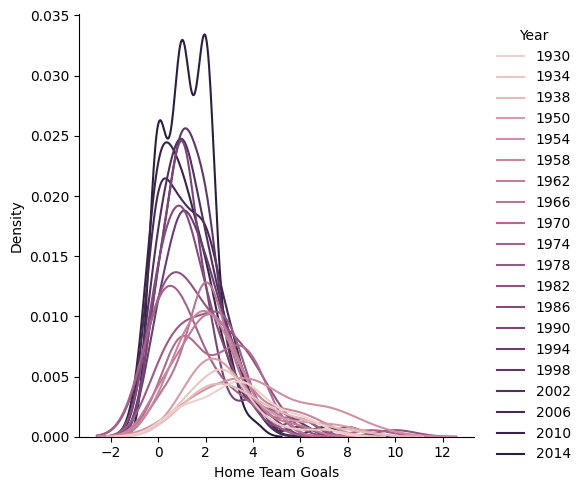

In [13]:
sns.displot(df, x='Home Team Goals', kind='kde', hue='Year')

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

<ipython-input-15-b8dbd833d491>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


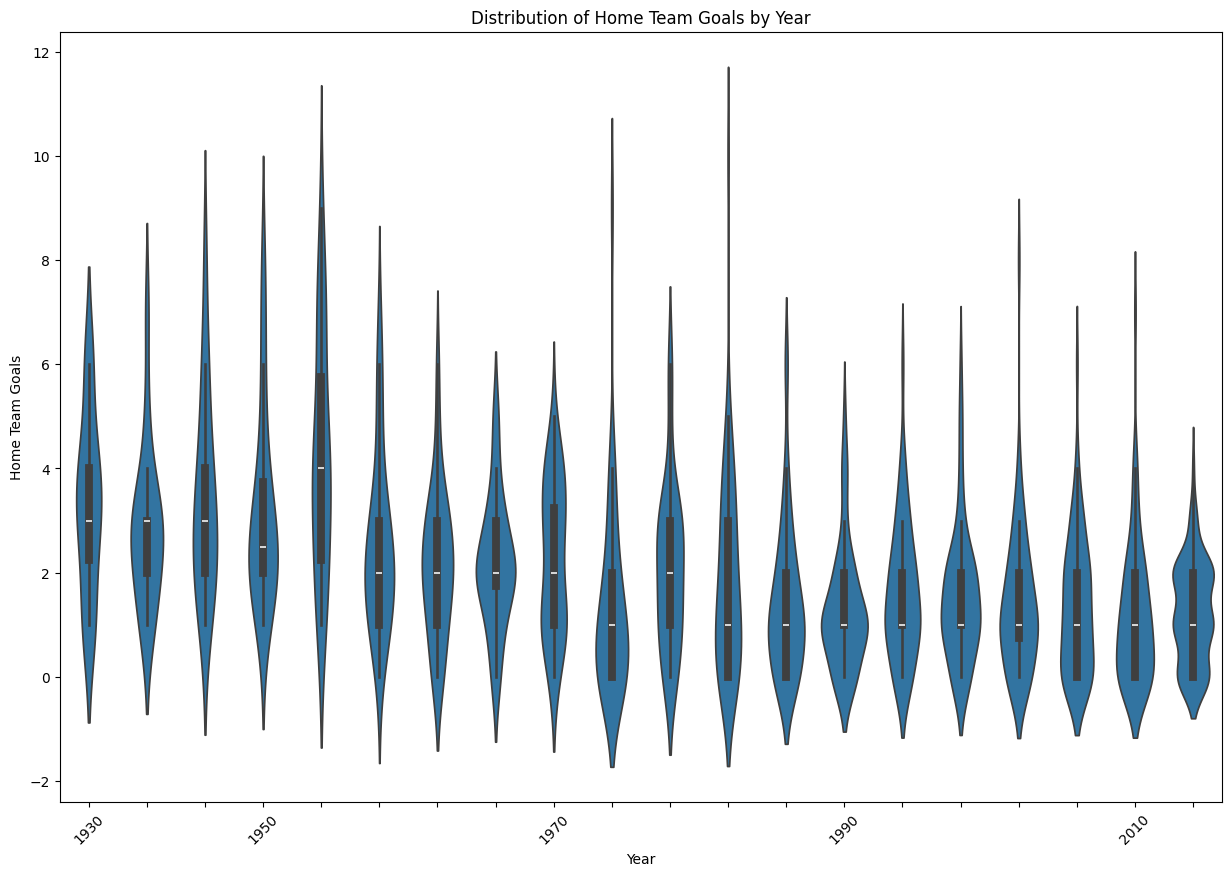

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Draw the violin plot
# Use 'df' instead of 'world_cup_matches'
sns.violinplot(x='Year', y='Home Team Goals', data=df)

# Prepare labels for select years ending with 0
# Use 'df' instead of 'world_cup_matches'
labels = [str(year) if year % 10 == 0 else '' for year in sorted(df['Year'].unique())]

# Set the xtick labels
ax = plt.gca()
ax.set_xticklabels(labels)

# Show the plot
plt.xticks(rotation=45)
plt.title('Distribution of Home Team Goals by Year')
plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [16]:
!pip install joypy

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-21-d941c2d92f1f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


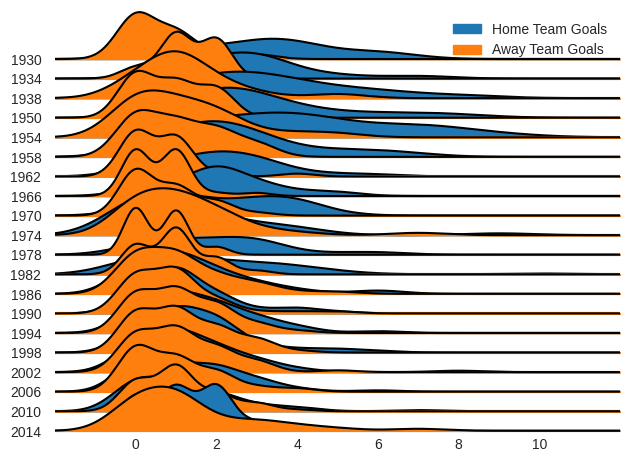

In [21]:
import joypy as jp
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

print(plt.style.available)
plt.style.use('seaborn-white')
jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', ylim='own', legend=True )
plt.legend()
plt.show()


**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



In [24]:
# Group by 'Home Team Initials' and calculate the sum of 'Home Team Goals'
home_goals_sum = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Display the new DataFrame
home_goals_sum.head()


,Home Team Initials,Home Team Goals
0,ALG,5
1,ANG,0
2,ARG,111
3,AUS,7
4,AUT,31


<ipython-input-27-cf5b9d9b4caa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_countries, x='Home Team Initials', y='Home Team Goals', palette='viridis')


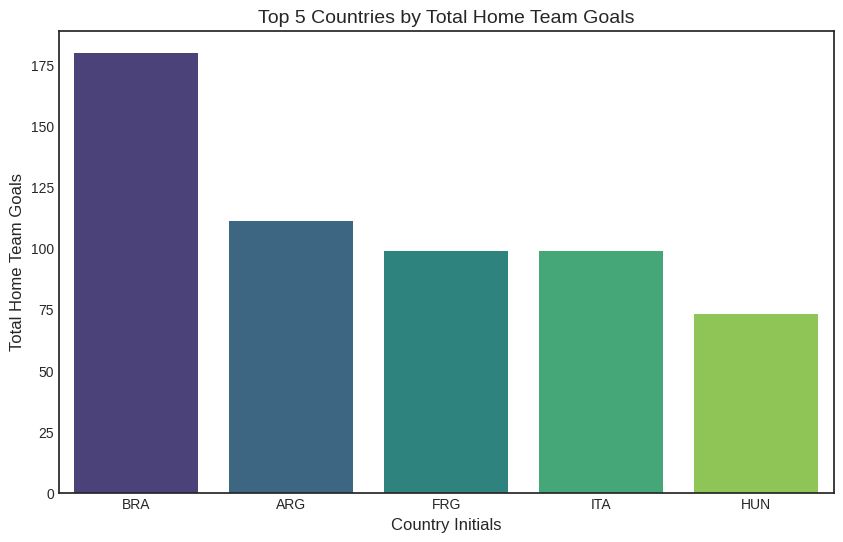

In [27]:
# Group by 'Home Team Initials' and calculate the sum of 'Home Team Goals'
home_goals_sum = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort the dataframe by 'Home Team Goals' in descending order
home_goals_sum_sorted = home_goals_sum.sort_values(by='Home Team Goals', ascending=False)

# Get the top 5 countries
top_5_countries = home_goals_sum_sorted.head(5)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_countries, x='Home Team Initials', y='Home Team Goals', palette='viridis')

# Add titles and labels
plt.title('Top 5 Countries by Total Home Team Goals', fontsize=14)
plt.xlabel('Country Initials', fontsize=12)
plt.ylabel('Total Home Team Goals', fontsize=12)

# Show the plot
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



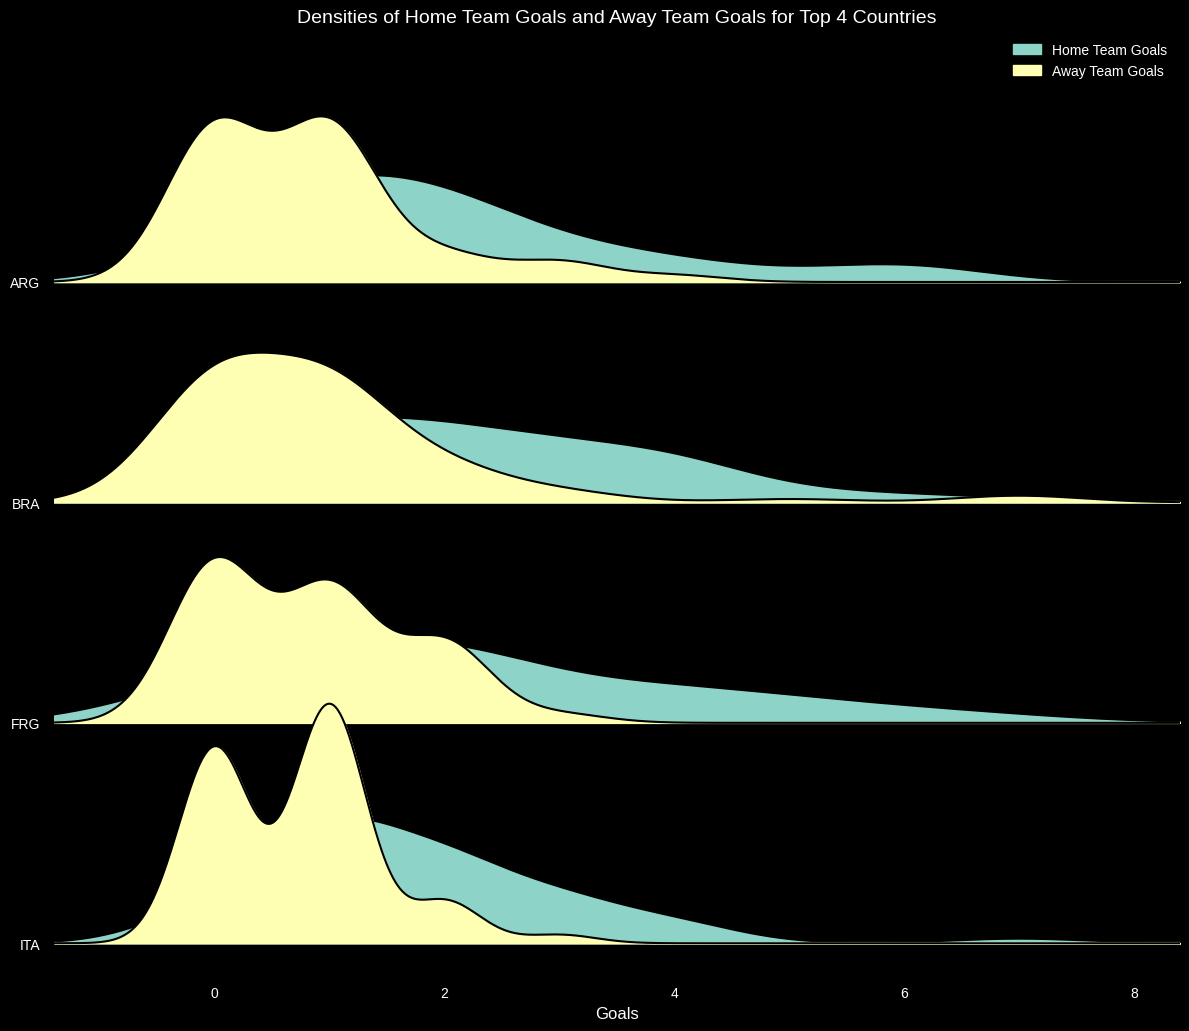

In [31]:
# Group by 'Home Team Initials' and calculate the sum of 'Home Team Goals'
home_goals_sum = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort the dataframe by 'Home Team Goals' in descending order
home_goals_sum_sorted = home_goals_sum.sort_values(by='Home Team Goals', ascending=False)

# Get the top 4 countries
top_4_countries = home_goals_sum_sorted.head(4)['Home Team Initials']

# Extract rows for the top 4 countries
top_4_matches = df[df['Home Team Initials'].isin(top_4_countries)]

# Set the style to dark_background
plt.style.use('dark_background')

# Create the joyplot
fig, axes = jp.joyplot(
    data=top_4_matches,
    by='Home Team Initials',
    column=['Home Team Goals', 'Away Team Goals'],
    figsize=(12, 10),
    legend=True,
)

# Add titles and labels
plt.title('Densities of Home Team Goals and Away Team Goals for Top 4 Countries', fontsize=14)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Country Initials', fontsize=12)

# Show the plot
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [32]:
!pip install seaborn_qqplot

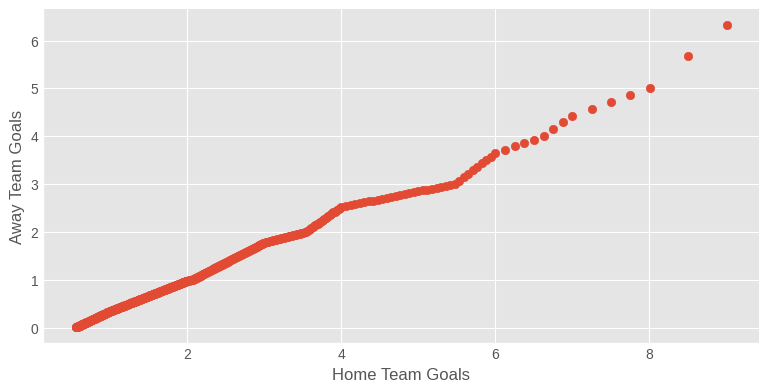

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.

# Draw the qqplot
pplot(data=df, x='Home Team Goals', y='Away Team Goals', kind='qq', height=4, aspect=2) # Added data argument with DataFrame and changed x and y to column names.
plt.show()

The distribution is consistent as The Home team scores more goals. When Home scores 2 Away scores 1, when Home scores 4 Away scores 2.5, when Home scores 6 Away scores about 3.5, and when Home scores 8 Away only gets 5.